In [1]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
sns.set_style("white")

## Load files
We need 3 files:
1. File with sequences and their respective lengths (we defined the promoter regions could be between 100 and 800 nt in size)
2. File with motifs and their relative location in each promoter region
3. File with gene expression data

Each sequence also receives an ID (number).

In [4]:
# file containing the length of each sequence
len_df = pd.read_csv("seq_len.csv")
len_df

,seq,len,seq_id
0,scga7_uti_cns_0076886.2,800,0
1,scga7_uti_cns_0077418.1,800,1
2,scga7_uti_cns_0096244.2,800,2
3,scga7_uti_cns_0129233.2,800,3
4,scga7_uti_cns_0268911.1,800,4


In [5]:
# file containing the motifs and their relative location to the TSS
motif_df = pd.read_csv("motifs.csv")
motif_df.head()

,seq,motif,motif_location,seq_id,dataset
0,scga7_uti_cns_0076886.2,TGA10/TGA6/TGA9/bZIP50,-36,0,motif_mapping
1,scga7_uti_cns_0076886.2,TGA4,-49,0,motif_mapping
2,scga7_uti_cns_0077418.1,TGA10/TGA6/TGA9/bZIP50,-82,1,motif_mapping
3,scga7_uti_cns_0077418.1,TGA4,-95,1,motif_mapping
4,scga7_uti_cns_0096244.2,DREB1A/RAP210,-599,2,motif_mapping


In [8]:
# expression data

tmp_df = pd.read_csv("FPKM.csv", names=["gene", "Sspon_L1", "Soff_L1", "L1", "I1", "I5"],header=0)

# select genes of interest
# this can be a file too
gene_list = ["scga7_uti_cns_0129233.2",
            "scga7_uti_cns_0096244.2",
            "scga7_uti_cns_0077418.1",
            "scga7_uti_cns_0076886.2",
            "scga7_uti_cns_0268911.1"]
# select the genes of interest
expression_df = tmp_df[tmp_df["gene"].isin(gene_list)]
# select columns
expression_df = expression_df[["gene", "L1", "I1", "I5"]]
# order the dataframe so that the sequences are displayed in the same order as they'll be plotted in the first graph
expression_df['index'] = expression_df.gene.map(len_df.set_index('seq')['seq_id'].to_dict())
expression_df = expression_df.sort_values(by=["index"], ascending=False)
expression_df = expression_df.drop("index", 1)
expression_df = expression_df.set_index(expression_df.columns[0])
expression_df.head()

,L1,I1,I5
gene,,,
scga7_uti_cns_0268911.1,44.69,5.85,12.21
scga7_uti_cns_0129233.2,178.65,27.37,29.85
scga7_uti_cns_0096244.2,178.65,27.37,29.85
scga7_uti_cns_0077418.1,218.69,38.24,46.98
scga7_uti_cns_0076886.2,19.60,3.42,4.36


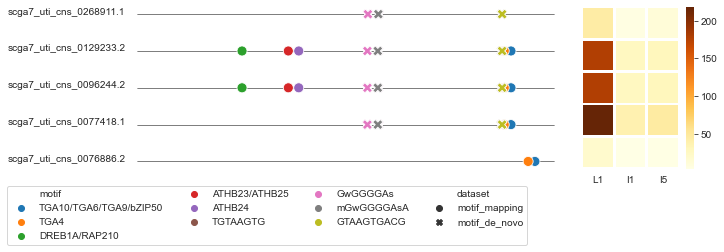

In [9]:
# plot figure

fig = plt.figure(figsize=(15,2.5)) # change size according to number of sequences to display
# the options top, bottom, left and right can be adjusted to make the two plots closer or farther from each other
gs = gridspec.GridSpec(1,2, width_ratios=[3.5, 1], wspace=0.0, hspace=0.025, top=0.95, bottom=0.05, left=0.3, right=0.845)

# first plot
ax=plt.subplot(gs[0,0])
# plot the lines representing each promoter region
for entry, index in zip(len_df.seq, len_df.index):
    seq_len = len_df.iloc[index]['len']
    x1 = [-seq_len, seq_len-seq_len]
    y1 = [index, index]
    plt.plot(x1, y1, linewidth=0.5, color='black', zorder=1)
    plt.text(-1050, index, entry)
plt.xticks([])
plt.yticks([])
sns.despine(left=True, bottom=True)

# plot motifs
ax=sns.scatterplot(x='motif_location', y='seq_id', data=motif_df, hue='motif', style='dataset', s=100, zorder=5)
# change numbers in bbox_to_anchor to change the location of the legend
plt.legend(loc = "lower left", bbox_to_anchor=(-0.25, -0.5), ncol=4)

# second plot -> heatmap
ax1=plt.subplot(gs[0,1])
ax1=sns.heatmap(expression_df, cmap= 'YlOrBr', linewidths=2, xticklabels=True, square=True)
plt.yticks([])
ax1.set_ylabel('')


plt.show()
# save fig
fig.savefig('figure.png', dpi=600, bbox_inches='tight')